# HOUSE PRICE PREDICTION

## PROBLEM STATEMENT

#### Buying a house is dream for many people, but they often don't know the price given the features of the house they want.
#### So, they may end up paying more than the actual price. So, we are builing a linear regression model to predict the house price

### Data Definition

#### MSSubClass: Identifies the type of dwelling involved in the sale
#### MSZoning: Identifies the general zoning classification of the sale.
#### LotFrontage: Linear feet of street connected to property
#### LotArea: Lot size in square feet
#### Street: Type of road access to property
#### Alley: Type of alley access to property
#### LotShape: General shape of property
#### LandContour: Flatness of the property
#### Utilities: Type of utilities available
#### LotConfig: Lot configuration
#### LandSlope: Slope of property
#### Neighborhood: Physical locations within Ames city limits
#### Condition1: Proximity to various conditions
#### Condition2: Proximity to various conditions (if more than one is present)
#### BldgType: Type of dwelling
#### HouseStyle: Style of dwelling
#### OverallQual: Rates the overall material and finish of the house
#### OverallCond: Rates the overall condition of the house
#### YearBuilt: Original construction date
#### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
#### RoofStyle: Type of roof
#### RoofMatl: Roof material
#### Exterior1st: Exterior covering on house
#### Exterior2nd: Exterior covering on house (if more than one material)
#### MasVnrType: Masonry veneer type
#### MasVnrArea: Masonry veneer area in square feet
#### ExterQual: Evaluates the quality of the material on the exterior 
#### ExterCond: Evaluates the present condition of the material on the exterior
#### Foundation: Type of foundation
#### BsmtQual: Evaluates the height of the basement
#### BsmtCond: Evaluates the general condition of the basement
#### BsmtExposure: Refers to walkout or garden level walls
#### BsmtFinType1: Rating of basement finished area
#### BsmtFinSF1: Type 1 finished square feet
#### BsmtFinType2: Rating of basement finished area (if multiple types)
#### BsmtFinSF2: Type 2 finished square feet
#### BsmtUnfSF: Unfinished square feet of basement area
#### TotalBsmtSF: Total square feet of basement area
#### Heating: Type of heating
#### HeatingQC: Heating quality and condition
#### CentralAir: Central air conditioning
#### Electrical: Electrical system
#### 1stFlrSF: First Floor square feet
#### 2ndFlrSF: Second floor square feet
#### LowQualFinSF: Low quality finished square feet (all floors)
#### GrLivArea: Above grade (ground) living area square feet
#### BsmtFullBath: Basement full bathrooms
#### BsmtHalfBath: Basement half bathrooms
#### FullBath: Full bathrooms above grade
#### HalfBath: Half baths above grade
#### Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
#### Kitchen: Kitchens above grade
#### KitchenQual: Kitchen quality
#### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#### Functional: Home functionality (Assume typical unless deductions are warranted)
#### Fireplaces: Number of fireplaces
#### FireplaceQu: Fireplace quality
#### GarageType: Garage location
#### GarageYrBlt: Year garage was built
#### GarageFinish: Interior finish of the garage
#### GarageCars: Size of garage in car capacity
#### GarageArea: Size of garage in square feet
#### GarageQual: Garage quality
#### GarageCond: Garage condition
#### PavedDrive: Paved driveway
#### WoodDeckSF: Wood deck area in square feet
#### OpenPorchSF: Open porch area in square feet
#### EnclosedPorch: Enclosed porch area in square feet
#### 3SsnPorch: Three season porch area in square feet
#### ScreenPorch: Screen porch area in square feet
#### PoolArea: Pool area in square feet
#### PoolQC: Pool quality
#### Fence: Fence quality
#### MiscFeature: Miscellaneous feature not covered in other categories
#### MiscVal:Value of miscellaneous feature
#### MoSold: Month Sold (MM)
#### YrSold: Year Sold (YYYY)
#### SaleType: Type of sale
#### SaleCondition: Condition of sale

## 1.Import Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

## 2.Read Data

In [3]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3.Data Analysis and Preparation

### 3.1.1 Data Dimension

In [3]:
# no. of row and columns
df.shape

(1460, 81)

### 3.1.2 Data Types

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.1.3 Separate the numeric and category data

In [6]:
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(exclude=np.number)

In [7]:
discrete_feature=[feature for feature in num_df.columns if len(df[feature].unique())<25 and feature not in 'Id']
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [8]:
print(discrete_feature)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### 3.1.4 Change the incorrect data types

In [4]:
# MSSubClass,
# YrSold,MoSold

# convert numeric variable  to object (categorical) variable

selected_discrete_features=["MSSubClass","YrSold","MoSold"]
for i in selected_discrete_features:
    df[i] = df[i].astype('object')
    

### 3.1.5 Recheck the data types after the conversion

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1399.0,69.363474,21.951565,21.0,60.0,70.0,80.0,313.0
LotArea,1399.0,10155.280915,8324.834198,1300.0,7442.0,9317.0,11316.5,164660.0
OverallQual,1399.0,5.983560,1.282272,1.0,5.0,6.0,7.0,10.0
OverallCond,1399.0,5.591137,1.118236,1.0,5.0,5.0,6.0,9.0
YearBuilt,1399.0,1970.080772,30.009463,1872.0,1953.0,1971.0,1999.0,2009.0
YearRemodAdd,1399.0,1984.058613,20.661160,1950.0,1966.0,1992.0,2003.0,2010.0
MasVnrArea,1399.0,89.725518,159.219858,0.0,0.0,0.0,143.0,1600.0
BsmtFinSF1,1399.0,417.333095,428.401771,0.0,0.0,370.0,686.0,5644.0
BsmtFinSF2,1399.0,47.478914,162.648530,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1399.0,559.461758,429.378909,0.0,218.0,476.0,807.0,2042.0


###  3.2 Missing Values

In [12]:
nan_features=df.isnull().sum()[df.isnull().sum()>0].index
nan_percentage_val=df.isnull().sum()[df.isnull().sum()>0].values/len(df)
nan_percentage_val=[round(i,3)*100 for i in nan_percentage_val]
missing_data=dict(zip(nan_features,nan_percentage_val))
sorted_missing_data={k: v for k, v in sorted(missing_data.items(), key=lambda item: item[1],reverse=True)}
missing_df=pd.DataFrame(list(sorted_missing_data.items()),columns=["Features_name","Missing_percentage"])
missing_df

,Features_name,Missing_percentage
0,PoolQC,99.5
1,MiscFeature,96.3
2,Alley,93.8
3,Fence,80.8
4,FireplaceQu,47.3
5,LotFrontage,17.7
6,GarageType,5.5
7,GarageYrBlt,5.5
8,GarageFinish,5.5
9,GarageQual,5.5


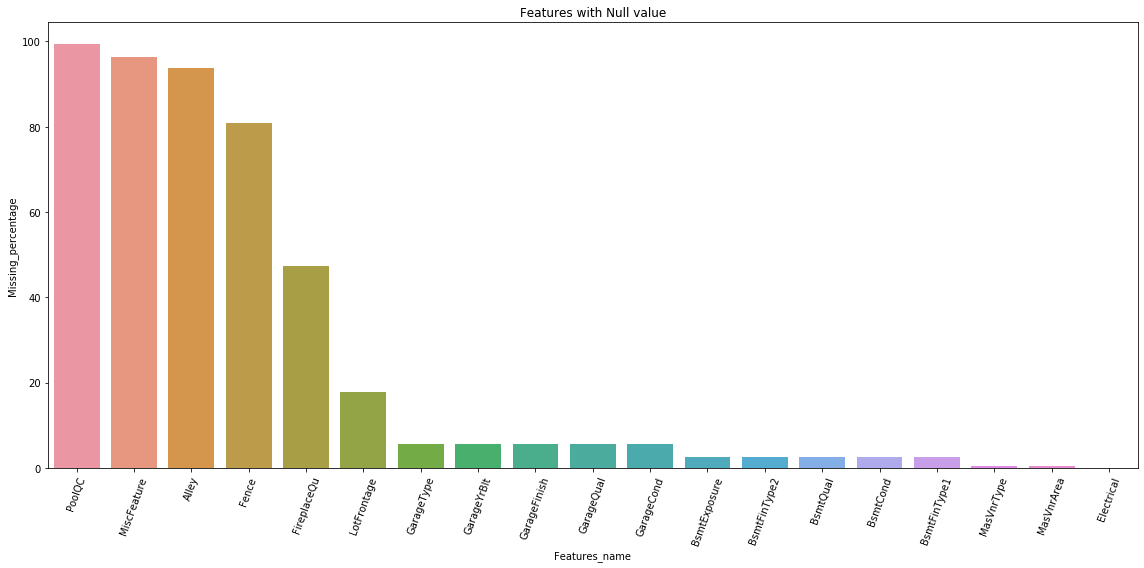

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(missing_df["Features_name"],missing_df["Missing_percentage"])

plt.title("Features with Null value")
plt.xticks(rotation=70)
plt.tight_layout()

### 3.2.1 Visualize Missing Values using Heatmap

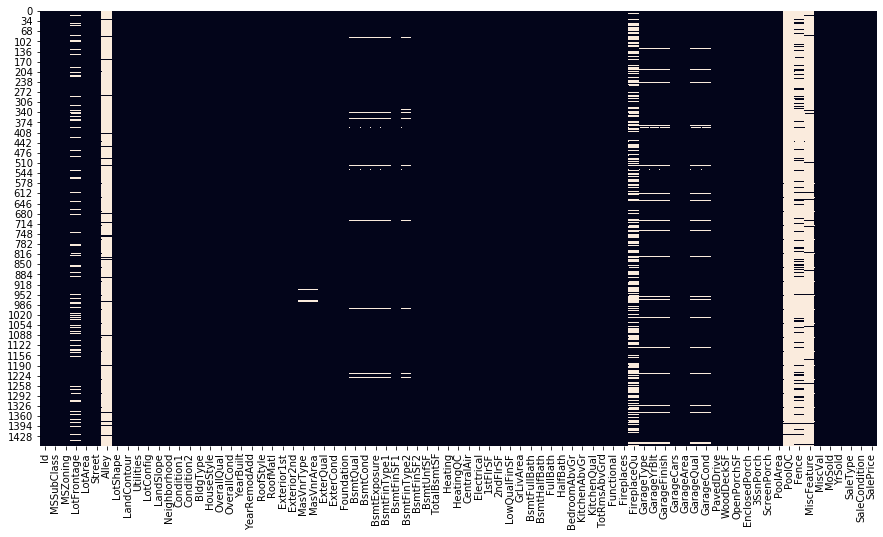

In [14]:
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

In [15]:
nan_features

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

### 3.2.2 Deal with Missing Values

In [5]:
# features such as Alley,FireplaceQu,PoolQC,Fence,MiscFeature have more than 45% missing value
df=df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],1)
df=df.drop("Id",1) #this is unique for all the datapoints

# Replacing missing data with 0 Since No garage = no cars in such garage.
# filling null values of columns GarageType, GarageFinish, GarageQual and GarageCond 
# None indicate there is no Garage for the house 
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["GarageType"] = df["GarageType"].fillna("none")
df["GarageFinish"] = df["GarageFinish"].fillna("none")
df["GarageQual"] = df["GarageQual"].fillna("none")
df["GarageCond"] = df["GarageCond"].fillna("none")

# by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


# filling null values of columns MasVnrType
# for having no masonry veneer for these houses
# extra space outside the house
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["MasVnrType"] = df["MasVnrType"].fillna("none")


# It has one NA value. Since this feature has mostly 'SBrkr', 
# so we are filling missing values with "SBrkr" using mode
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])


# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2
# replacing missing values with none for having on basement
df["BsmtQual"] = df["BsmtQual"].fillna("none")
df["BsmtCond"] = df["BsmtCond"].fillna("none")
df["BsmtExposure"] = df["BsmtExposure"].fillna("none")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("none")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("none")


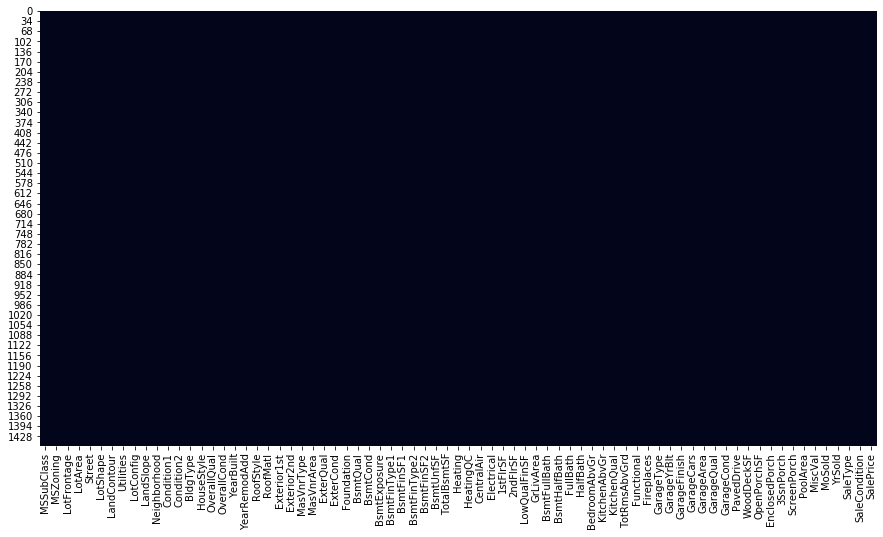

In [17]:
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

### 3.3 Correlation

#### 1. Filter out only the numeric variables from the dataframe using select_dtypes() function

In [18]:
num_df=df.select_dtypes(include=np.number)
num_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

#### 2. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

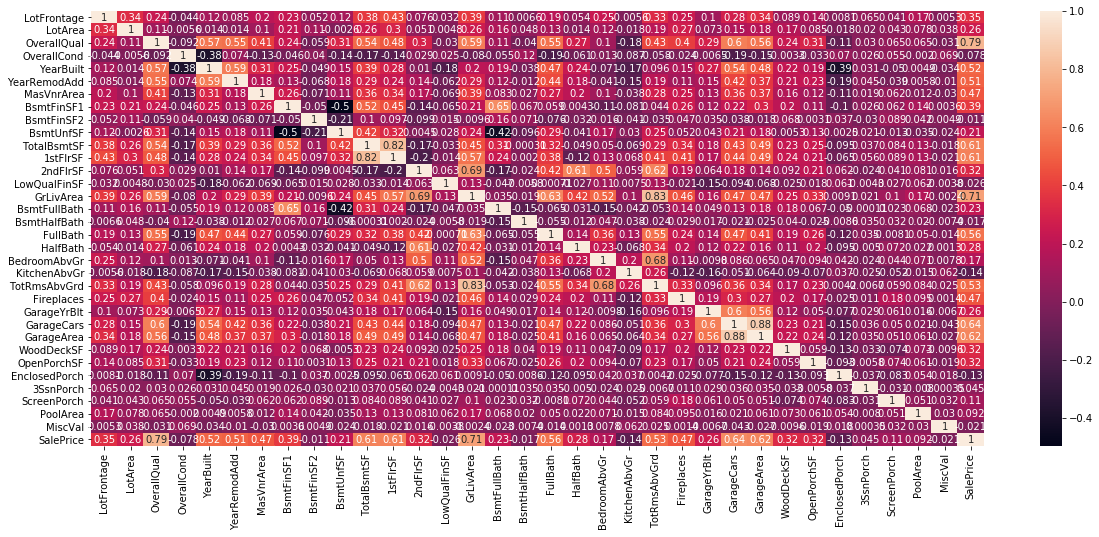

In [19]:
# correlation bwtween continuous features
# generate the correlation matrix
corr =  num_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)

In [6]:

# TotRmsAbvGrd and GrLivArea (0.83) (drop either one of them)
# GarageCars and GarageArea (0.88)
# 1stFlrSF and TtalBsmtSF (0.82), will keep this features for calculating new features

df=df.drop(["TotRmsAbvGrd","GarageArea"],1)
df.shape

(1460, 73)

####  Analyze Categorical Variables 

In [21]:
cat_df=df.select_dtypes(exclude=np.number)
len(cat_df.columns)

41

In [22]:
cat_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

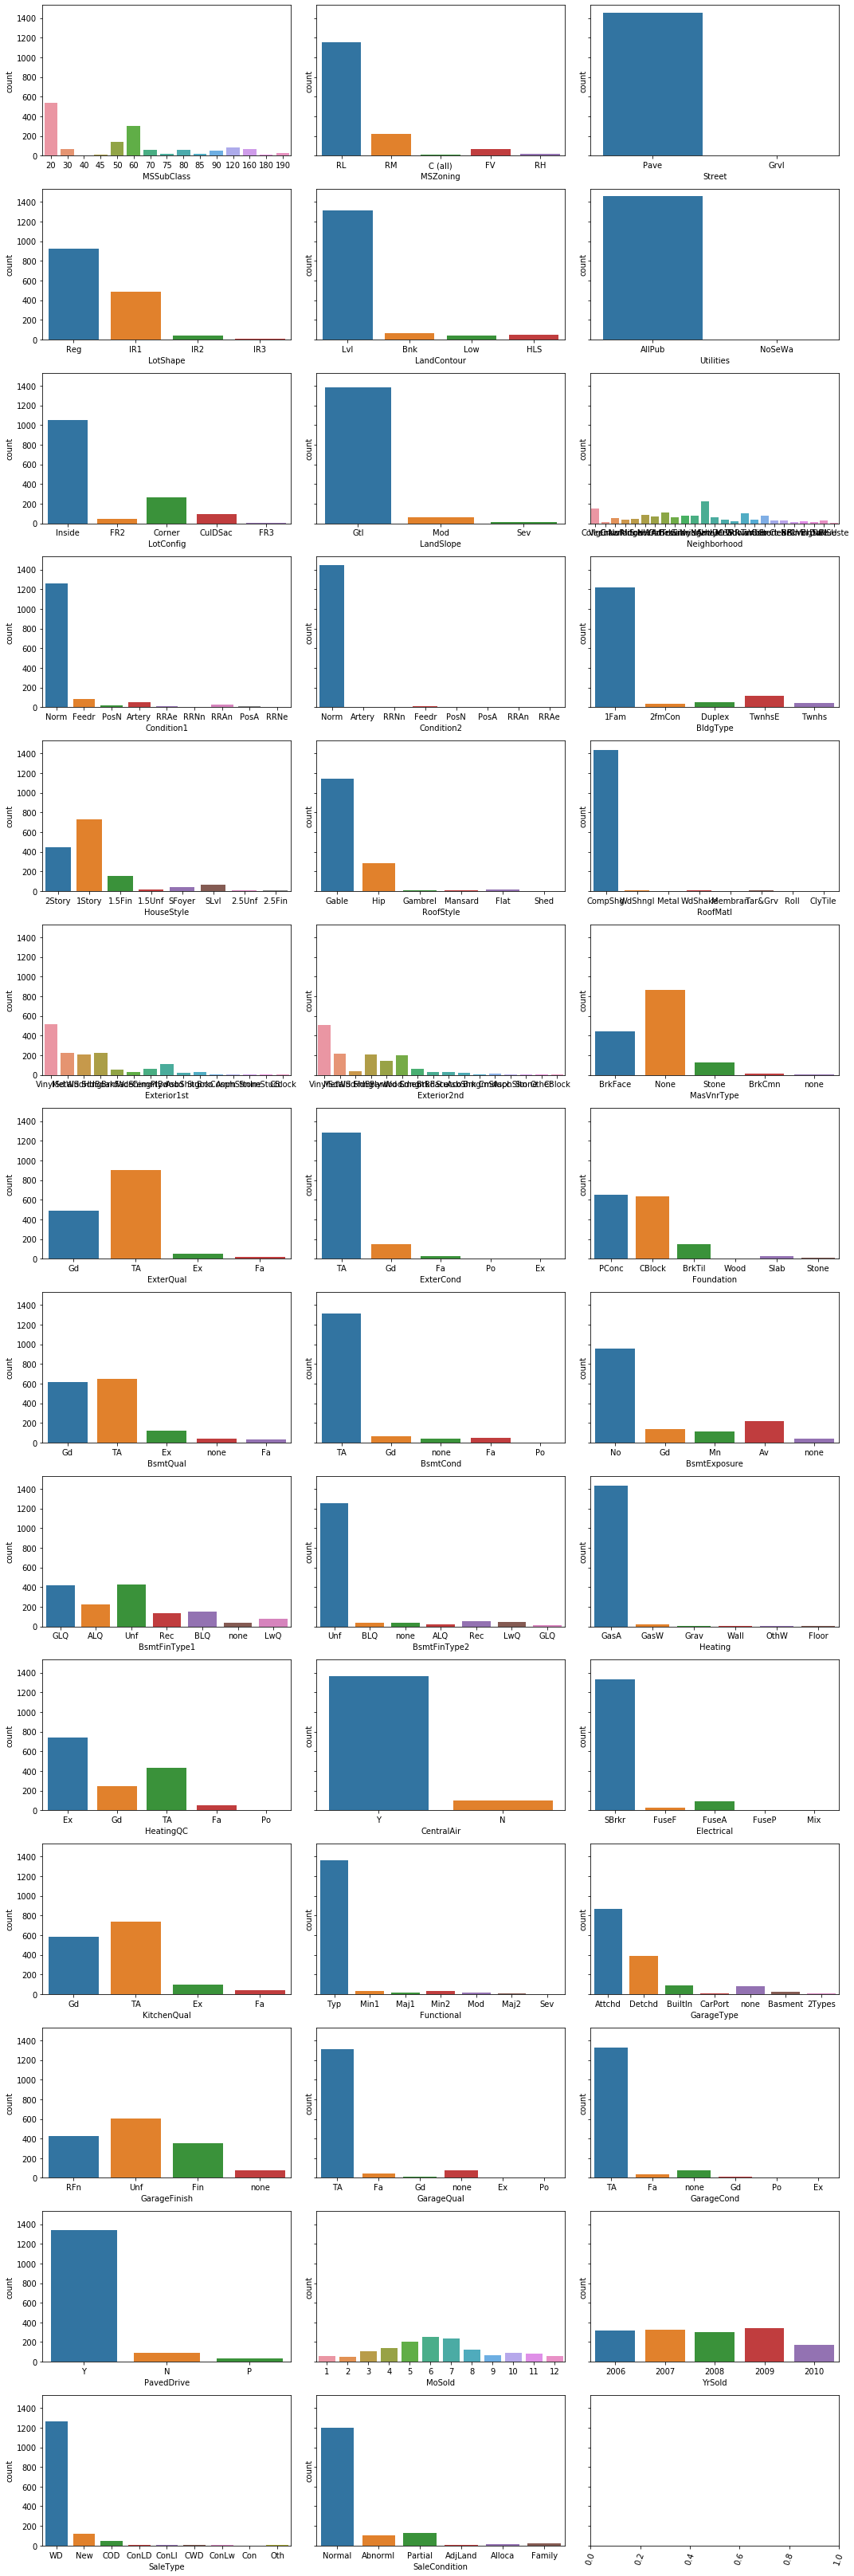

In [23]:
# count plot
fig, axes = plt.subplots(14, 3, figsize=(15, 45), sharey=True)
k=0
for i in range(14):
    for j in range(3):
        if i==13 and j==2:
            break
        sns.countplot(ax=axes[i, j], data=cat_df, x=cat_df.columns[k])
        plt.xticks(rotation=70)
        plt.tight_layout()
        k+=1

In [7]:
# Utilities,Street,Condition2,RoofMatl,Heating are the features which has very low variance
# drop this features
df=df.drop(["Utilities","Street","Condition2","RoofMatl","Heating"],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### 3.Analyze Relationship Between Target and Categorical Variables

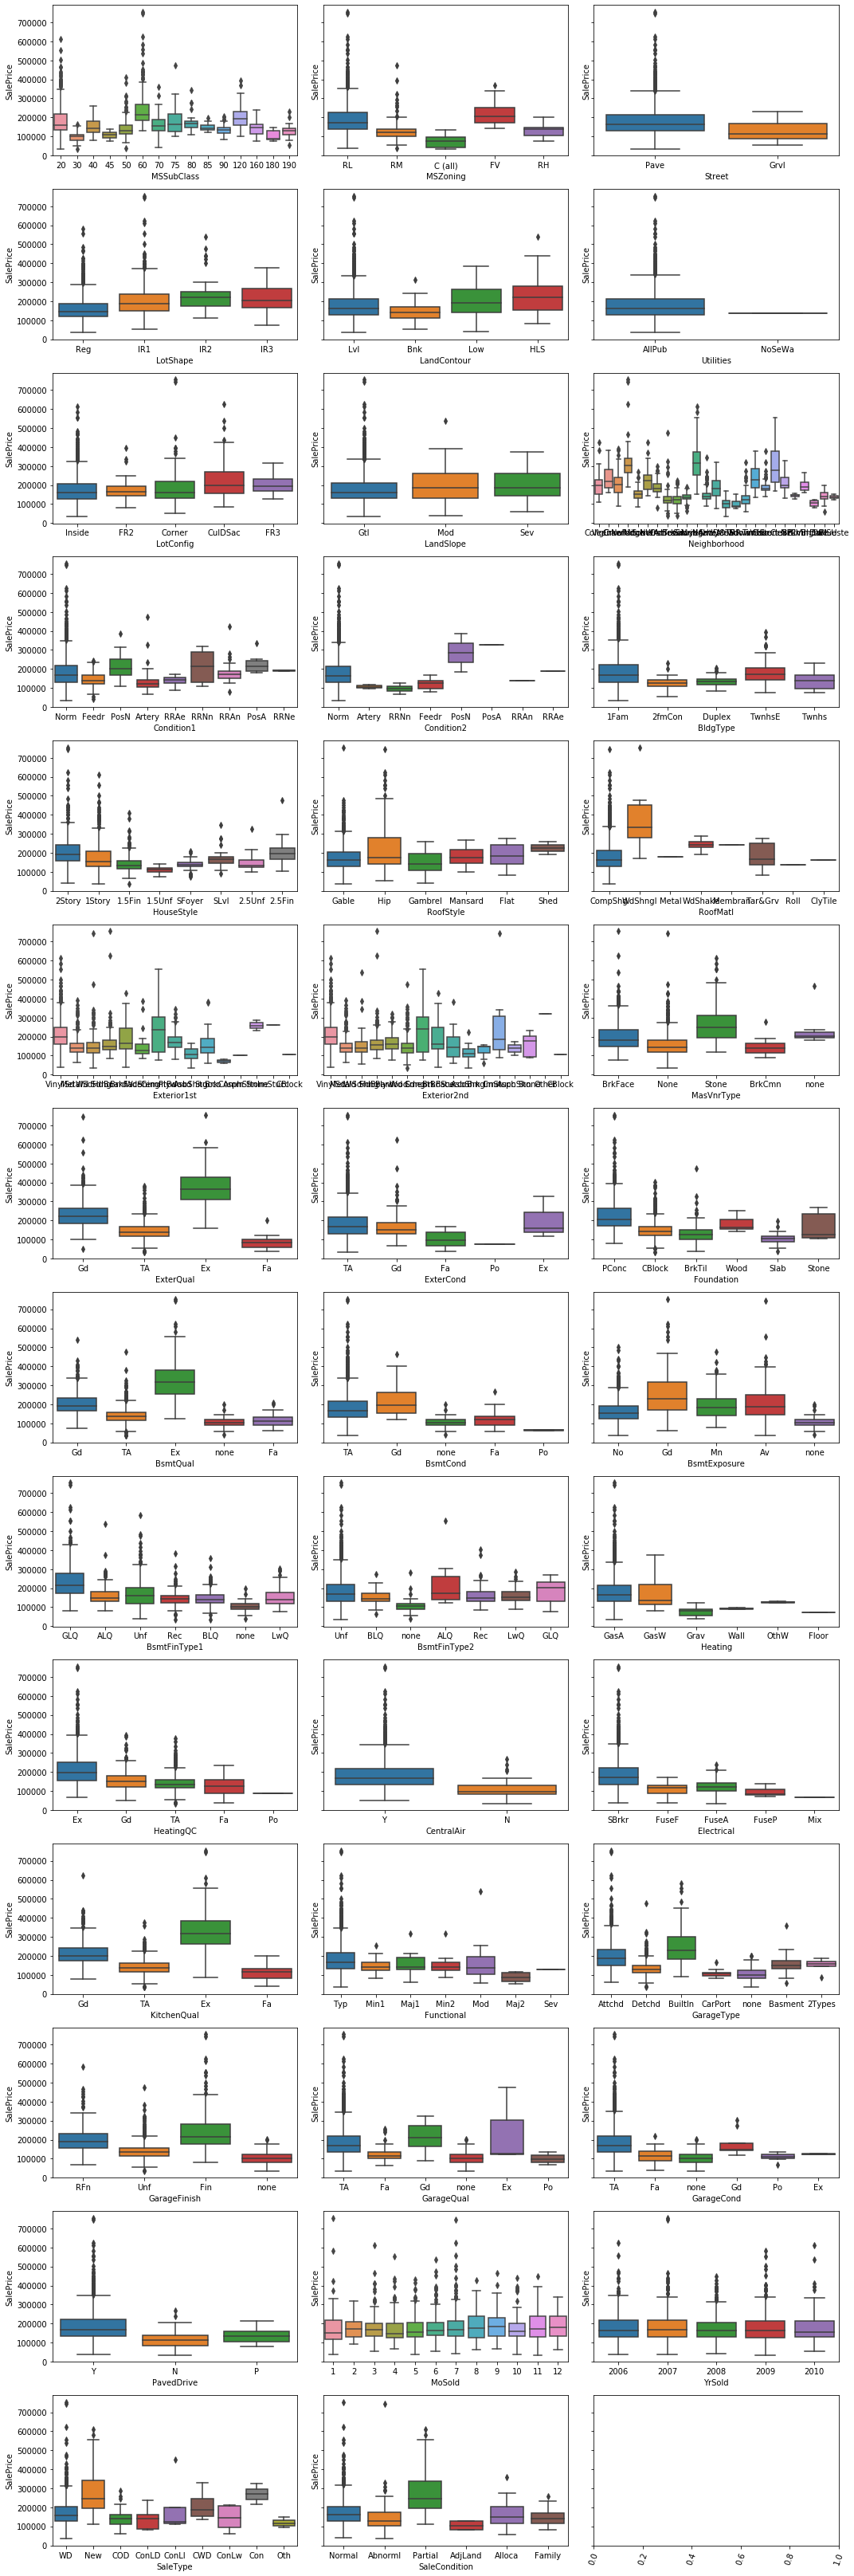

In [25]:
# boxplot
fig, axes = plt.subplots(14, 3, figsize=(15, 45), sharey=True)
k=0
for i in range(14):
    for j in range(3):
        if i==13 and j==2:
            break
        sns.boxplot(ax=axes[i, j], data=cat_df, x=cat_df.columns[k],y=df["SalePrice"])
        plt.xticks(rotation=70)
        plt.tight_layout()
        k+=1

In [26]:
# selling price of house in each month remains same
# from 2006 to 2010, the median of selling price is almost same

### 3.4 Feature engineering

In [27]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 

In [8]:
# calculating house_age feature using YrSold and YearBuilt
df["house_age"]=df.YrSold.astype(int)-df.YearBuilt

# calculating Total_porch_sf feature
# porch is a space to put chairs on which to sit outside during the summer
df['Total_porch_sf'] = df['OpenPorchSF'] + df['3SsnPorch'] +df['EnclosedPorch'] + df['ScreenPorch']

# calcucating total area feature
df["total_area"]=df["1stFlrSF"]+df["2ndFlrSF"]+df["TotalBsmtSF"]

In [29]:
# house_age,Total_porch_sf,total_area are the new features created

#### Scatter plot between target and the new features created

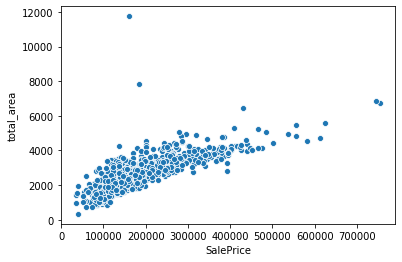

In [30]:
sns.scatterplot(df["SalePrice"],df["total_area"])

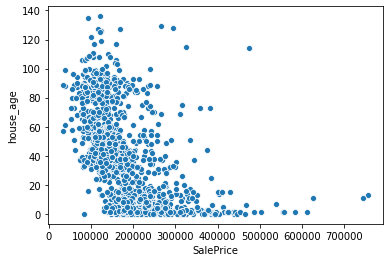

In [31]:
sns.scatterplot(df["SalePrice"],df["house_age"])

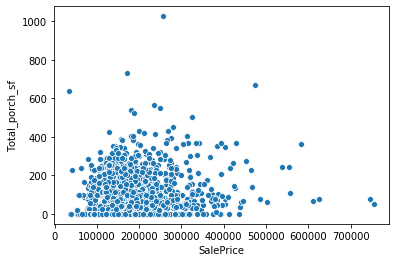

In [32]:
sns.scatterplot(df["SalePrice"],df["Total_porch_sf"])

In [33]:
# we can see some kind of linear relationship w.r.t saleprice

### 3.5 Outliers

In [9]:
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(exclude=np.number)

In [10]:
len(num_df.columns)

35

#### 1. Plot boxplot for numerical data

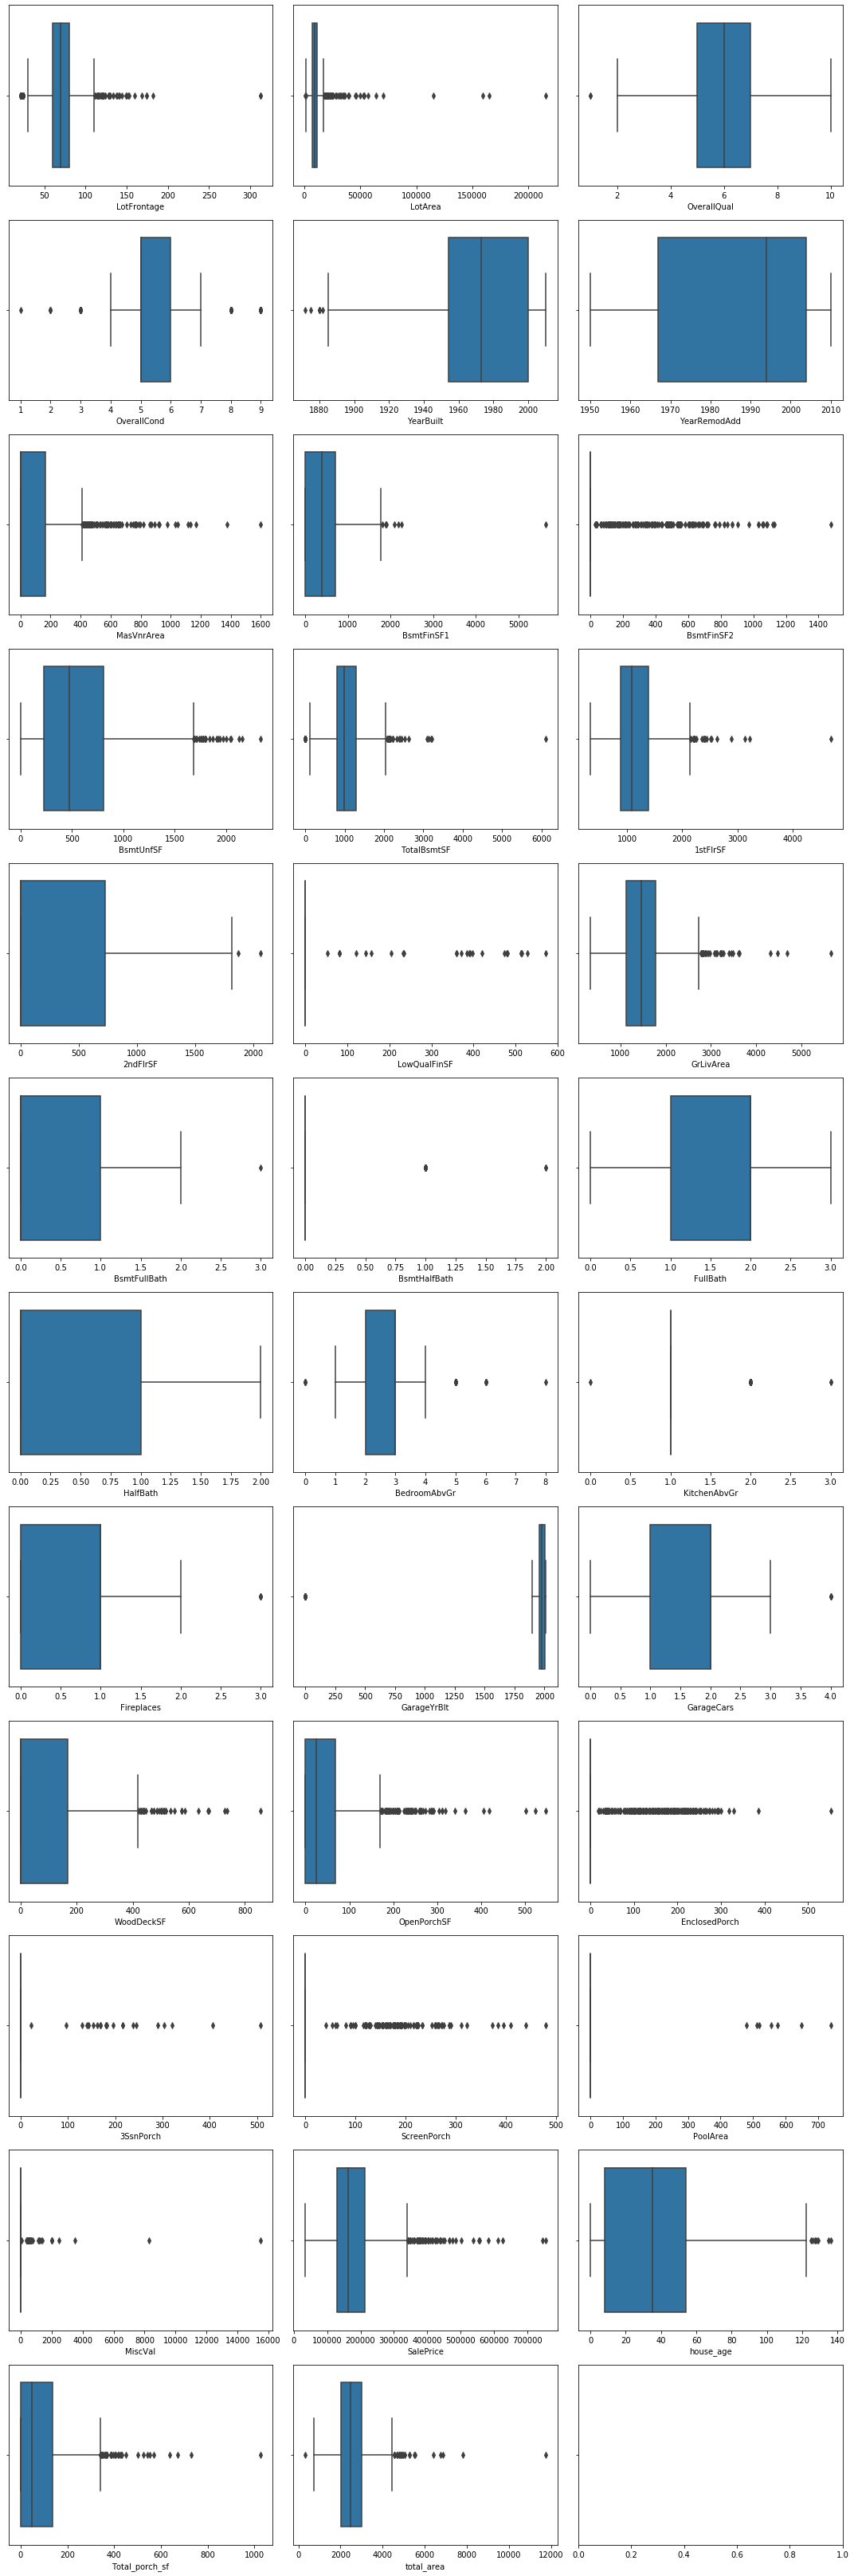

In [36]:
# boxplot
fig, axes = plt.subplots(12, 3, figsize=(15, 45), sharey=True)
k=0
for i in range(12):
    for j in range(3):
        
        if i==11 and j==2:
            break
        sns.boxplot(ax=axes[i, j], data=num_df, x=num_df.columns[k])
        
        plt.tight_layout()
        k+=1

In [37]:
# Many of the house doesn't have pool
# many house have no Miscellaneous feature


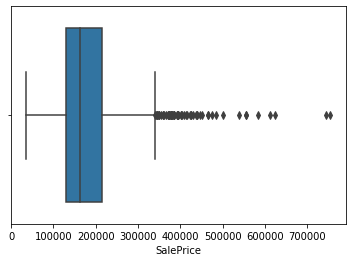

In [38]:
# remove outliers w.r.t saleprice
sns.boxplot(df["SalePrice"])

#### 2. Remove outliers by IQR method

In [11]:
# remove outliers w.r.t target variable

q1=df["SalePrice"].quantile(0.25)
q3=df["SalePrice"].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
print("upper_bound:",ub)
print("lower_bound:",lb)

upper_bound: 340037.5
lower_bound: 3937.5


In [12]:
df=df[~((df["SalePrice"]<lb) | (df["SalePrice"]>ub))]
df.reset_index(drop=True,inplace=True)
df.shape

(1399, 71)

#### 3. Plot boxplot to recheck for outliers

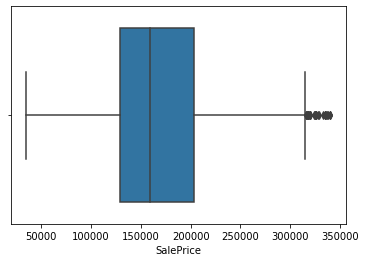

In [41]:
# recheck outliers
sns.boxplot(df["SalePrice"])

### 3.6 Encoding of Categorical Variables

#### 1. Filter numerical and categorical variables

In [13]:
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(exclude=np.number)

In [43]:
num_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'house_age', 'Total_porch_sf', 'total_area'],
      dtype='object')

In [44]:
cat_df.head(2)

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,Typ,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,Typ,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal


In [45]:
cat_df.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### 2. Ordinal encode the catergorical variables

In [14]:
# Excellent-5,Good-4,Typical/Average-3,Fair-2,Poor-1

ordinal_encode={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"none":0}

cat_df["ExterQual"]=cat_df["ExterQual"].map(ordinal_encode)
cat_df["ExterCond"]=cat_df["ExterCond"].map(ordinal_encode)
cat_df["BsmtQual"]=cat_df["BsmtQual"].map(ordinal_encode)
cat_df["BsmtCond"]=cat_df["BsmtCond"].map(ordinal_encode)
cat_df["HeatingQC"]=cat_df["HeatingQC"].map(ordinal_encode)
cat_df["KitchenQual"]=cat_df["KitchenQual"].map(ordinal_encode)
cat_df["GarageQual"]=cat_df["GarageQual"].map(ordinal_encode)
cat_df["GarageCond"]=cat_df["GarageCond"].map(ordinal_encode)


# Good Exposure-4, Average Exposure-3, Mimimum Exposure-2, No Exposure-1, No Basement-0 
ordinal_encode_2={"Gd":4,"Av":3,"Mn":2,"No":1,"none":0}
cat_df["BsmtExposure"]=cat_df["BsmtExposure"].map(ordinal_encode_2)

# Good Living Quarters-6, Average Living Quarters-5, Below Average Living Quarters-4, Average Rec Room-3
# Low Quality-2, Unfinshed-1, No Basement-0
ordinal_encode_3={"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"none":0}
cat_df["BsmtFinType1"]=cat_df["BsmtFinType1"].map(ordinal_encode_3)
cat_df["BsmtFinType2"]=cat_df["BsmtFinType2"].map(ordinal_encode_3)


In [47]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1399 non-null   object
 1   MSZoning       1399 non-null   object
 2   LotShape       1399 non-null   object
 3   LandContour    1399 non-null   object
 4   LotConfig      1399 non-null   object
 5   LandSlope      1399 non-null   object
 6   Neighborhood   1399 non-null   object
 7   Condition1     1399 non-null   object
 8   BldgType       1399 non-null   object
 9   HouseStyle     1399 non-null   object
 10  RoofStyle      1399 non-null   object
 11  Exterior1st    1399 non-null   object
 12  Exterior2nd    1399 non-null   object
 13  MasVnrType     1399 non-null   object
 14  ExterQual      1399 non-null   int64 
 15  ExterCond      1399 non-null   int64 
 16  Foundation     1399 non-null   object
 17  BsmtQual       1399 non-null   int64 
 18  BsmtCond       1399 non-null

#### 3. Dummy encode the catergorical variables

In [15]:
#one_hot_encode=["MSSubClass","MSZoning","LotShape","LandContour","LotConfig","LandSlope","Neighborhood","Condition1","BldgType","HouseStyle","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","Foundation","CentralAir","Electrical","Functional","GarageType","GarageFinish","PavedDrive","MoSold","YrSold","SaleType","SaleCondition"]
cat_df=pd.get_dummies(cat_df,drop_first=True)
cat_df.head(2)

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4,3,4,3,1,6,1,5,4,3,...,0,0,0,0,1,0,0,0,1,0
1,3,3,4,3,4,5,1,5,3,3,...,0,0,0,0,1,0,0,0,1,0


In [49]:
num_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,house_age,Total_porch_sf,total_area
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,61,0,0,0,0,0,208500,5,61,2566
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,0,0,181500,31,0,2524
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,42,0,0,0,0,0,223500,7,42,2706
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,35,272,0,0,0,0,140000,91,307,2473
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,84,0,0,0,0,0,250000,8,84,3343


### 3.7 Standerdise the numeric data 

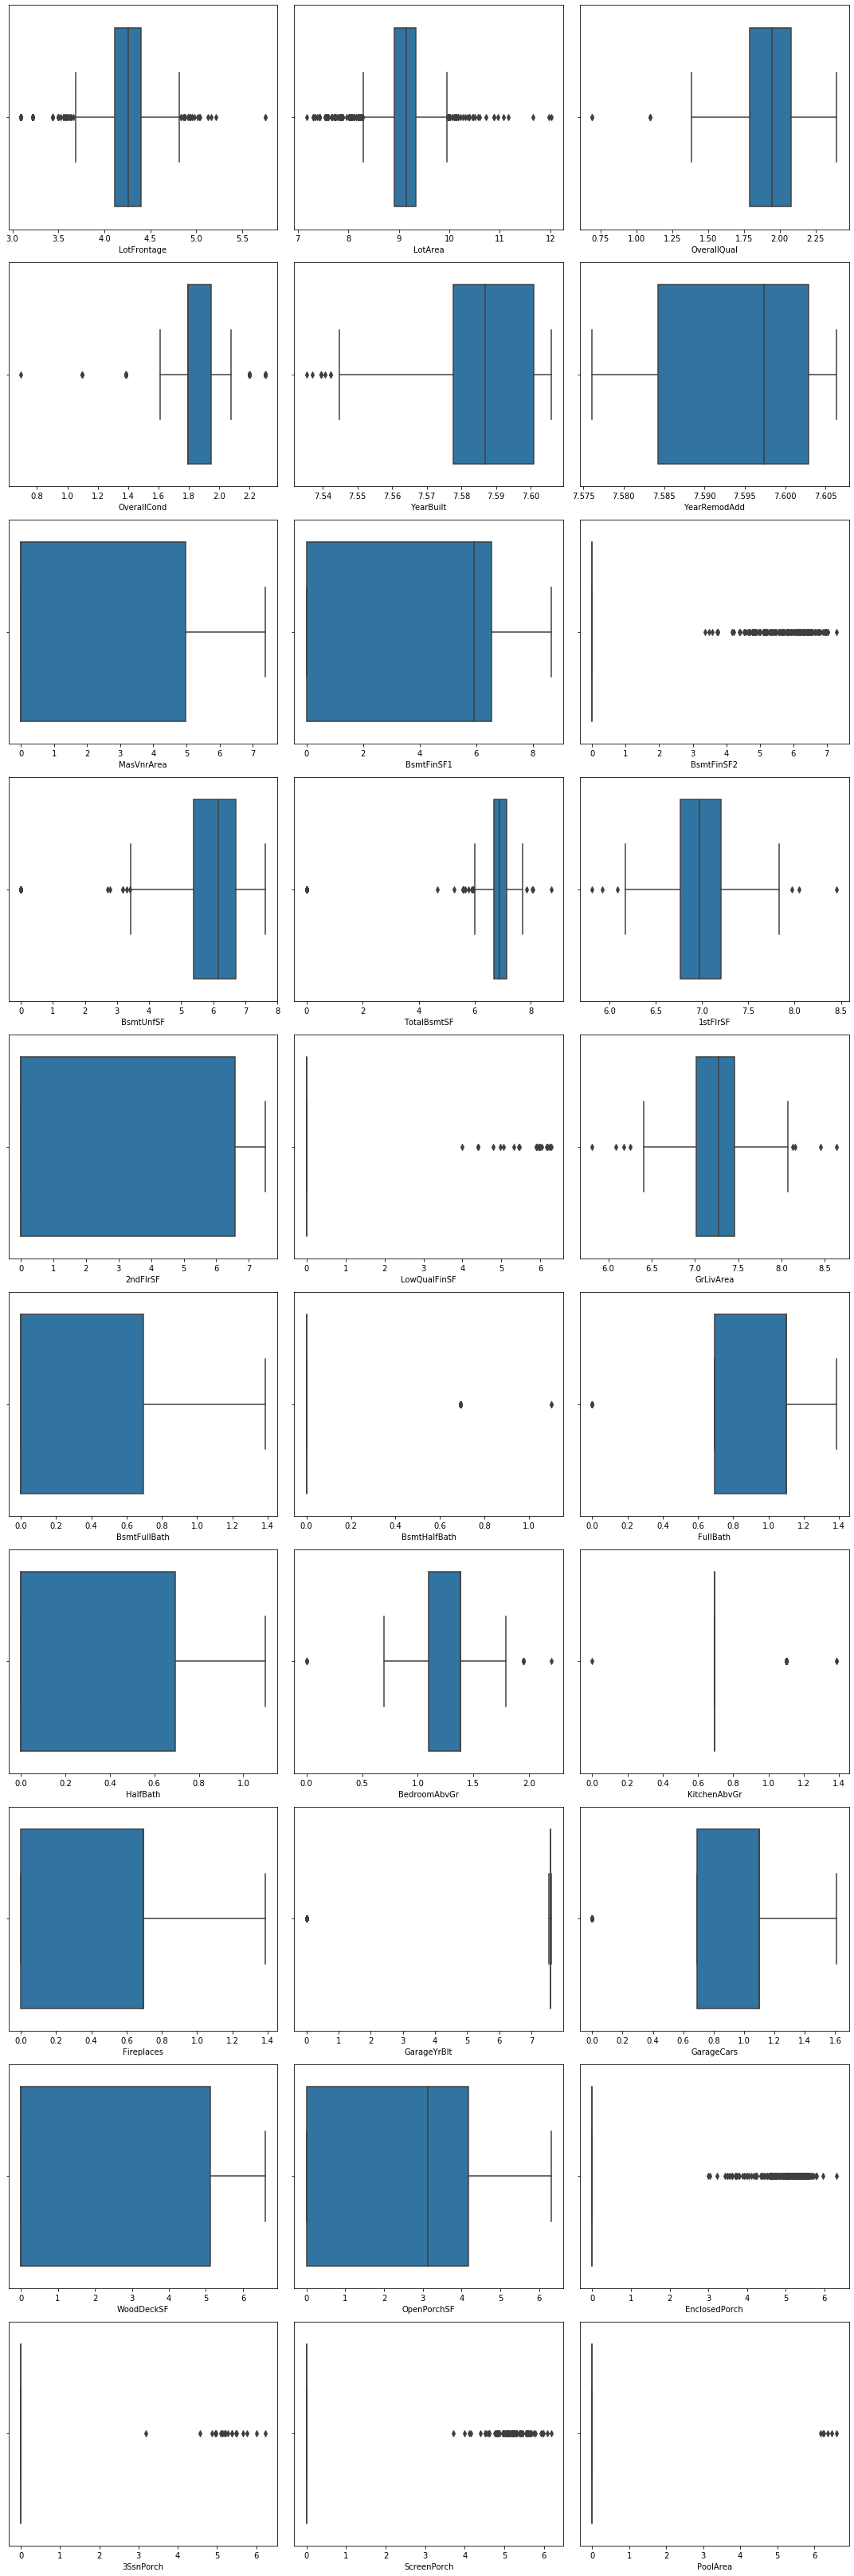

In [16]:
# log transform the numerical data to reduce skewness
num_df=num_df.transform(lambda x: np.log(x+1))
fig, axes = plt.subplots(10, 3, figsize=(15, 45), sharey=True)
k=0
for i in range(10):
    for j in range(3):
        
        if i==11 and j==2:
            break
        sns.boxplot(ax=axes[i, j], data=num_df, x=num_df.columns[k])
        
        plt.tight_layout()
        k+=1

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_df_transform=sc.fit_transform(num_df)
num_df_transform=pd.DataFrame(num_df_transform,columns=num_df.columns)
num_df_transform.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,house_age,Total_porch_sf,total_area
0,-0.050460,-0.094186,0.797303,-0.472080,1.090937,0.915769,1.279258,0.804153,-0.360273,-0.322435,...,0.878783,-0.409818,-0.125619,-0.289658,-0.065612,-0.194744,0.741736,-1.050771,0.477855,0.240152
1,0.586888,0.157758,0.104530,1.926599,0.203741,-0.384830,-0.778799,0.913289,-0.360273,0.015591,...,-1.043639,-0.409818,-0.125619,-0.289658,-0.065612,-0.194744,0.351744,0.269299,-1.381024,0.184516
2,0.087880,0.470935,0.797303,-0.472080,1.025630,0.867912,1.205457,0.679171,-0.360273,0.240614,...,0.708331,-0.409818,-0.125619,-0.289658,-0.065612,-0.194744,0.937100,-0.823910,0.313037,0.419242
3,-0.295636,0.147447,0.797303,-0.472080,-1.846112,-0.676263,-0.778799,0.408139,-0.360273,0.356662,...,0.625567,2.809190,-0.125619,-0.289658,-0.065612,-0.194744,-0.378314,1.102084,1.199838,0.115701
4,0.736899,0.939094,1.408372,-0.472080,0.992952,0.772126,1.504253,0.779051,-0.360273,0.305057,...,1.025751,-0.409818,-0.125619,-0.289658,-0.065612,-0.194744,1.252195,-0.731028,0.619965,1.131939


In [18]:
# combining numerical and categorical features
data_final=pd.concat([num_df_transform,cat_df],axis=1)
data_final.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.050460,-0.094186,0.797303,-0.472080,1.090937,0.915769,1.279258,0.804153,-0.360273,-0.322435,...,0,0,0,0,1,0,0,0,1,0
1,0.586888,0.157758,0.104530,1.926599,0.203741,-0.384830,-0.778799,0.913289,-0.360273,0.015591,...,0,0,0,0,1,0,0,0,1,0


In [19]:
# store the new features created in new dataframe
df_new_features=data_final[["house_age","Total_porch_sf","total_area"]]

# final dataframe after preprocessing
data_final_v1=data_final.drop(["house_age","Total_porch_sf","total_area"],1)
data_final_v1.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.050460,-0.094186,0.797303,-0.472080,1.090937,0.915769,1.279258,0.804153,-0.360273,-0.322435,...,0,0,0,0,1,0,0,0,1,0
1,0.586888,0.157758,0.104530,1.926599,0.203741,-0.384830,-0.778799,0.913289,-0.360273,0.015591,...,0,0,0,0,1,0,0,0,1,0


# 5.1 Linear Regression (OLS)

#### 1.Split the data into training and test sets

In [20]:

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = data_final_v1.drop(["SalePrice"],1)

# extract the target variable from the data set
y = df["SalePrice"]

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.15)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1189, 208)
The shape of X_test is: (210, 208)
The shape of y_train is: (1189,)
The shape of y_test is: (210,)


#### 2. Build model using sm.OLS().fit()

In [21]:

# build a full model using OLS()
# consider the transform_saleprice
X_train_withconstant=sm.add_constant( X_train)
linreg = sm.OLS(y_train,X_train_withconstant).fit()

# print the summary output
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     46.88
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:23:50   Log-Likelihood:                -13337.
No. Observations:                1189   AIC:                         2.709e+04
Df Residuals:                     983   BIC:                         2.813e+04
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.473e+

In [56]:
# there is high multi collinearity

#### 3. Predict the values using test set

In [22]:
from statsmodels.api import add_constant
X_test_with_constant=add_constant(X_test,has_constant='add')
predicted_salesprice = linreg.predict(X_test_with_constant)


actual_salesprice = y_test

#### 4. Compute accuracy measures

In [23]:
# calculate rmse using rmse()
test_rmse = rmse(actual_salesprice, predicted_salesprice)
train_rmse=rmse(y_train,linreg.predict())
# calculate R-squared using rsquared
linreg_rsquared = linreg.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_rsquared_adj = linreg.rsquared_adj 


#### 5. Tabulate the results

In [24]:
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'Train_RMSE',"Test_RMSE"])

linreg_metrics = pd.Series({
                     'Model_Name': "Linreg with insignificant variable",
                     'Train_RMSE':train_rmse,
                     'Test_RMSE':test_rmse,
                     'R-Squared': linreg_rsquared,
                     'Adj. R-Squared': linreg_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card


,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.9072,0.887846,17992.10574,25063.779662


### 5.2 Lets handle multicollinearity problem

In [60]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
267,2.311976,1.520067,-1.641118,-0.472080,-0.628608,-1.605024,-0.778799,0.212297,-0.360273,0.526931,...,0,0,0,0,1,0,0,0,1,0
1152,0.949172,0.996950,0.797303,1.229810,0.665271,0.339902,1.347967,0.678482,2.422068,0.898283,...,0,0,0,0,1,0,0,0,1,0
1026,0.388596,0.775320,0.797303,0.439855,-0.998224,0.002375,-0.778799,0.622283,-0.360273,0.183867,...,0,0,0,0,0,0,0,0,1,0
12,0.983185,0.363082,0.797303,-0.472080,1.188776,1.106958,1.452078,-1.395653,-0.360273,0.897572,...,0,0,1,0,0,0,0,0,0,1
1146,0.388596,0.468300,-1.641118,-0.472080,-0.227759,-0.239445,0.760397,0.718738,-0.360273,0.320018,...,0,0,0,0,1,0,0,0,1,0


#### 1.Using variance_inflation_factor

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['feature']=X_train.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
105,inf,BldgType_Duplex
177,inf,GarageFinish_none
174,inf,GarageType_none
137,inf,Exterior2nd_CBlock
51,inf,MSSubClass_90
...,...,...
201,1.272645,SaleType_Oth
157,1.261210,Foundation_Wood
68,1.234588,LotConfig_FR3
102,1.228565,Condition1_RRNe


In [26]:
X_train_v1=X_train.drop(["BldgType_Duplex","Exterior2nd_CBlock","GarageFinish_none","GarageType_none","GarageCond","GarageQual","GarageType_Attchd","MSZoning_RL","MasVnrType_None","Exterior1st_VinylSd","BsmtCond","ExterQual","RoofStyle_Gable","Functional_Typ","HouseStyle_1Story","ExterCond","BsmtQual","KitchenQual","Exterior2nd_CmentBd","Exterior2nd_MetalSd","BldgType_TwnhsE","SaleType_WD","HeatingQC","2ndFlrSF","HouseStyle_2Story","LandContour_Lvl","Condition1_Norm","SaleCondition_Partial","CentralAir_Y","MSSubClass_190","PavedDrive_Y","BsmtFinType1","Exterior2nd_VinylSd","Electrical_SBrkr","MasVnrType_BrkFace","GrLivArea","BsmtFinType2","Exterior1st_HdBoard","HouseStyle_SLvl"],1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_train_v1.values,i) for i in range(X_train_v1.shape[1])]
vif['feature']=X_train_v1.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
168,14.535997,SaleCondition_Normal
4,13.099238,YearBuilt
124,12.364021,Foundation_PConc
68,11.789249,Neighborhood_NAmes
123,10.977483,Foundation_CBlock
...,...,...
101,1.137863,Exterior1st_CBlock
158,1.135117,SaleType_CWD
161,1.123332,SaleType_ConLI
122,1.086828,MasVnrType_none


In [63]:
X_train_v1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
267,2.311976,1.520067,-1.641118,-0.472080,-0.628608,-1.605024,-0.778799,0.212297,-0.360273,0.526931,...,0,0,0,0,0,0,0,0,0,1
1152,0.949172,0.996950,0.797303,1.229810,0.665271,0.339902,1.347967,0.678482,2.422068,0.898283,...,0,0,0,0,0,0,0,0,0,1
1026,0.388596,0.775320,0.797303,0.439855,-0.998224,0.002375,-0.778799,0.622283,-0.360273,0.183867,...,0,0,0,0,0,0,0,0,0,1
12,0.983185,0.363082,0.797303,-0.472080,1.188776,1.106958,1.452078,-1.395653,-0.360273,0.897572,...,0,0,0,0,1,0,0,0,0,0
1146,0.388596,0.468300,-1.641118,-0.472080,-0.227759,-0.239445,0.760397,0.718738,-0.360273,0.320018,...,0,0,0,0,0,0,0,0,0,1


### 5.2.1 Built a model after removing multi collinearity variables

In [27]:
inpc=sm.add_constant(X_train_v1)
# build a full model using OLS()
# consider the transform_saleprice
linreg_after_vif = sm.OLS(y_train, inpc).fit()

# print the summary output
print(linreg_after_vif.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     48.54
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:25:49   Log-Likelihood:                -13440.
No. Observations:                1189   AIC:                         2.722e+04
Df Residuals:                    1019   BIC:                         2.808e+04
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.663e+

In [65]:
# multicollinear problem is solved
# the condition no. is decrease from 9.7e+16 to 157

# accuracy

In [28]:

# remaining features after applying vif
selected_features=X_train_v1.columns
X_test_v1=X_test[selected_features]
# add constant to test data
X_test_with_constant=add_constant(X_test_v1,has_constant='add')
# predict the test data
predicted_salesprice = linreg_after_vif.predict(X_test_with_constant)



In [29]:
actual_salesprice = y_test


linreg_metrics1 = pd.Series({
                     'Model_Name': "Linreg after vif",
                     'Test_RMSE': rmse(actual_salesprice, predicted_salesprice),
                     'Train_RMSE':rmse(y_train,linreg_after_vif.predict()),
                     'R-Squared': linreg_after_vif.rsquared,
                     'Adj. R-Squared': linreg_after_vif.rsquared_adj    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics1, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346


In [68]:
# the test_rmse is decrease after removing multicollinearity features

### Assumption of linear regression

#### 1.  Detecting Autocorrelation

In [69]:
# Durbin-Watson static is 2.01 which is very close to 2, So there is no autocorrelation

#### 2.  Detecting Heteroskedasticity

[]

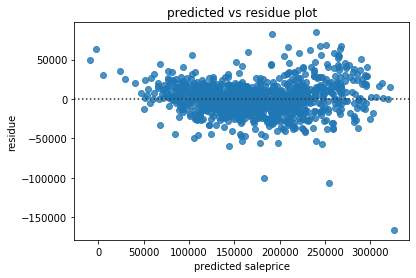

In [70]:
sns.residplot(linreg_after_vif.predict(),linreg_after_vif.resid)
plt.title("predicted vs residue plot")
plt.xlabel("predicted saleprice")
plt.ylabel("residue")
plt.plot()

In [71]:
# homoskedasticity is satisfied, since there is constant residue variance

In [72]:
from statsmodels.stats.api import het_goldfeldquandt
# h0: model is homoscadstic
f_value,p_value=het_goldfeldquandt(linreg_after_vif.resid,linreg_after_vif.model.exog)[:2]
print("P_value:",p_value)

P_value: 0.766814466204607


In [73]:
# since p_value>0.05, we accept the null hypothesis
# homoscadstic nature is satisfied

#### 3. Linearity 

Text(0, 0.5, 'predicted saleprice')

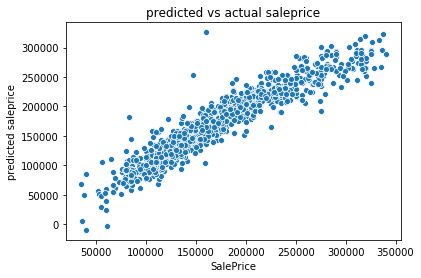

In [74]:
sns.scatterplot(y_train,linreg_after_vif.predict())
plt.title("predicted vs actual saleprice")
plt.ylabel("predicted saleprice")

In [75]:
# there is clear linear relationship between the predicted and actual target variable

In [76]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(res=linreg_after_vif,frac=0.7)

(1.0084876978075155, 0.4599950675080912)

#### 4. Normality


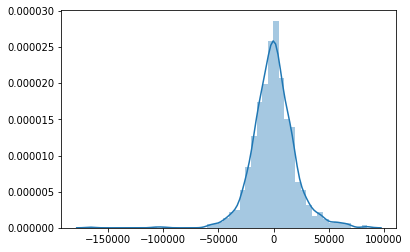

In [77]:
sns.distplot(linreg_after_vif.resid)

((array([-3.24716859, -2.98570646, -2.8400384 , ...,  2.8400384 ,
          2.98570646,  3.24716859]),
  array([-165974.64231905, -106809.09939461,  -99898.8472872 , ...,
           68927.79012271,   82971.95746977,   84750.26415703])),
 (19114.27970341661, 1.9947580124767488e-10, 0.9712735100348077))

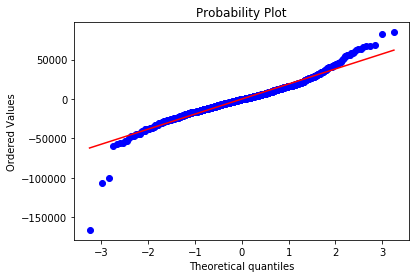

In [78]:
import scipy.stats as stats
stats.probplot(linreg_after_vif.resid,plot=plt)

In [79]:
linreg_after_vif.resid.skew()

-0.3174278824132242

### 5.2.2 lets built a model with power transformation of target

#### 1. Transform target

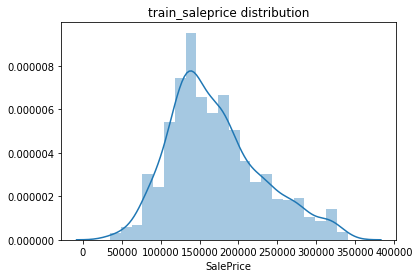

In [80]:
sns.distplot(y_train)
plt.title("train_saleprice distribution")
plt.show()

#### 2.Skewness

In [81]:
# training skewness
print("skewness of y_train:",y_train.skew())

skewness of y_train: 0.6231114555540772


In [82]:
# skewness after power transform
print("skewness after power transform:",np.power(y_train,0.3).skew())

skewness after power transform: -0.037828382773709236


In [30]:
y_train_transform=np.power(y_train,0.3)

### Model  with transform target

In [31]:
inpc=sm.add_constant(X_train_v1)
# build a full model using OLS()
# consider the transform_saleprice
linreg_with_transform_target = sm.OLS(y_train_transform, inpc).fit()

# print the summary output
print(linreg_with_transform_target.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     58.75
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:26:52   Log-Likelihood:                -1885.8
No. Observations:                1189   AIC:                             4112.
Df Residuals:                    1019   BIC:                             4975.
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    36.09

In [32]:
selected_features=X_train_v1.columns
X_test_v1=X_test[selected_features]
X_test_with_constant=add_constant(X_test_v1,has_constant='add')
predicted_transform_salesprice = linreg_with_transform_target.predict(X_test_with_constant)



In [33]:
predicted_salesprice=np.power(predicted_transform_salesprice,1/0.3)
train_predicted=np.power(linreg_with_transform_target.predict(),1/0.3)
actual_salesprice = y_test


linreg_metrics2 = pd.Series({
                     'Model_Name': "Linreg with power transform saleprice",
                     'Test_RMSE': rmse(actual_salesprice, predicted_salesprice),
                     'Train_RMSE':rmse(y_train,train_predicted),
                     'R-Squared': linreg_with_transform_target.rsquared,
                     'Adj. R-Squared': linreg_with_transform_target.rsquared_adj    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics2, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290


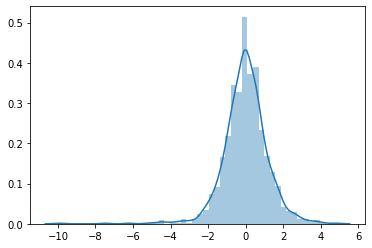

In [87]:
sns.distplot(linreg_with_transform_target.resid)

In [88]:
linreg_with_transform_target.resid.skew()

-0.8788570837734385

# practice

In [34]:
selected_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=169)

In [36]:
X[selected_features]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,-0.050460,-0.094186,0.797303,-0.472080,1.090937,0.915769,1.279258,0.804153,-0.360273,-0.322435,...,0,0,0,0,0,0,0,0,0,1
1,0.586888,0.157758,0.104530,1.926599,0.203741,-0.384830,-0.778799,0.913289,-0.360273,0.015591,...,0,0,0,0,0,0,0,0,0,1
2,0.087880,0.470935,0.797303,-0.472080,1.025630,0.867912,1.205457,0.679171,-0.360273,0.240614,...,0,0,0,0,0,0,0,0,0,1
3,-0.295636,0.147447,0.797303,-0.472080,-1.846112,-0.676263,-0.778799,0.408139,-0.360273,0.356662,...,0,0,0,0,0,0,0,0,0,0
4,0.736899,0.939094,1.408372,-0.472080,0.992952,0.772126,1.504253,0.779051,-0.360273,0.305057,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,-0.195236,-0.222834,0.104530,-0.472080,0.960258,0.772126,-0.778799,-1.395653,-0.360273,0.658521,...,0,0,0,0,0,0,0,0,0,1
1395,0.773299,0.782828,0.104530,0.439855,0.269873,0.195393,1.086155,0.841795,2.378083,0.402801,...,0,0,0,0,0,0,0,0,0,1
1396,-0.003660,0.039517,0.797303,2.549898,-0.964537,1.059197,-0.778799,0.488776,-0.360273,0.614343,...,0,0,0,0,0,0,0,0,0,1
1397,0.087880,0.181678,-0.695218,0.439855,-0.662124,0.580267,-0.778799,-0.084015,3.364694,-2.992378,...,0,0,0,0,0,0,0,0,0,1


In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet



In [93]:
paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100,200,500,1000]}]
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
 
lasso = ElasticNet()
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 5)
# fit the model on X_train and y_train using fit()
lasso_grid.fit(X[selected_features], y)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

Best parameters for Lasso Regression:  {'alpha': 0.1, 'l1_ratio': 0.9} 



In [100]:
kf=KFold(n_splits=5,shuffle=True)
lasso = ElasticNet(alpha=0.1,l1_ratio=0.9)
l=cross_val_score(lasso, X[selected_features], y, cv=kf)
l

array([0.84502944, 0.87713252, 0.80479954, 0.79516987, 0.87008552])

In [91]:
l.std()

0.026508823618480455

In [92]:
l.mean()

0.7896718883209737

In [101]:
l.std()

0.03330451789290259

In [102]:
l.mean()

0.8384433781248738

## 5.3 Removing insignificant features

In [89]:
# backward elimination

while(len(X_train_v1.columns)>0):
    inpc=sm.add_constant(X_train_v1)
    ols=sm.OLS(y_train,inpc)
    ols_mod=ols.fit()

    f=ols_mod.pvalues[1:].idxmax()
    if ols_mod.pvalues[1:].max()>0.05:
        X_train_v1=X_train_v1.drop(f,axis=1)
    else:
        break
        
print("The final feature are:",X_train_v1.columns)

The final feature are: Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'ScreenPorch', 'BsmtExposure', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90',
       'MSSubClass_120', 'LotShape_IR3', 'LotConfig_CulDSac',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_RRAe',
       'RoofStyle_Hip', 'RoofStyle_Shed', 'Exterior1st_BrkFace',
       'Exterior1s

In [90]:
significant_features=X_train_v1.columns

### 5.3.1 Model using Significant features

In [91]:
inpc=sm.add_constant(X_train_v1)
# build a full model using OLS()
# consider the transform_saleprice
linreg_with_significant_features = sm.OLS(y_train, inpc).fit()

# print the summary output
print(linreg_with_significant_features.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:45:28   Log-Likelihood:                -13492.
No. Observations:                1189   AIC:                         2.710e+04
Df Residuals:                    1129   BIC:                         2.741e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.61e+05 

In [92]:

X_test_v1=X_test[significant_features]
X_test_with_constant=add_constant(X_test_v1,has_constant='add')
predicted_salesprice = linreg_with_significant_features.predict(X_test_with_constant)


In [93]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "Linreg with significant_features",
                     'Test_RMSE': rmse(actual_salesprice, predicted_salesprice),
                     'Train_RMSE':rmse(y_train,linreg_with_significant_features.predict()),
                     'R-Squared': linreg_with_significant_features.rsquared,
                     'Adj. R-Squared': linreg_with_significant_features.rsquared_adj    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352


### 5.3.2 feature engineering new features

In [94]:
df_new_features.head(2)

,house_age,Total_porch_sf,total_area
0,-1.050771,0.477855,0.240152
1,0.269299,-1.381024,0.184516


In [95]:
X_train_v1.head(2)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,BsmtFullBath,FullBath,...,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Shng,Functional_Min1,Functional_Min2,Functional_Sev,GarageType_Basment,GarageType_BuiltIn,SaleType_New,SaleCondition_Normal
267,1.520067,-1.641118,-0.47208,-0.628608,-1.605024,-0.778799,0.212297,-0.738583,-0.809573,-0.983503,...,0,0,0,0,0,0,0,0,0,1
1152,0.996950,0.797303,1.22981,0.665271,0.339902,1.347967,0.678482,2.335735,-0.809573,0.864576,...,1,0,0,0,0,0,0,0,0,1


#### 1. Model with houge_age feature

In [96]:
X_train_v1_houseage=pd.concat([X_train_v1,pd.DataFrame(df_new_features["house_age"].loc[X_train.index])],1)
X_test_v1_houseage=pd.concat([X_test_v1,pd.DataFrame(df_new_features["house_age"].loc[X_test.index])],1)

                                                      

In [97]:
inpc=sm.add_constant(X_train_v1_houseage)
# build a full model using OLS()
# consider the transform_saleprice
linreg_with_house_age = sm.OLS(y_train, inpc).fit()

# print the summary output
print(linreg_with_house_age.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:45:28   Log-Likelihood:                -13490.
No. Observations:                1189   AIC:                         2.710e+04
Df Residuals:                    1128   BIC:                         2.741e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.615e+05 

In [98]:
selected_features=X_train_v1_houseage.columns
X_test_v=X_test_v1_houseage[selected_features]
X_test_with_constant=add_constant(X_test_v,has_constant='add')
predicted_salesprice = linreg_with_house_age.predict(X_test_with_constant)


In [99]:
actual_salesprice = y_test


linreg_metrics2 = pd.Series({
                     'Model_Name': "Linreg with house_age feature",
                     'Test_RMSE': rmse(actual_salesprice, predicted_salesprice),
                     'Train_RMSE':rmse(y_train,linreg_with_house_age.predict()),
                     'R-Squared': linreg_with_house_age.rsquared,
                     'Adj. R-Squared': linreg_with_house_age.rsquared_adj    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics2, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814


#### 2.Model with  total_area features

In [100]:
X_train_v1_total_area=pd.concat([X_train_v1,pd.DataFrame(df_new_features["total_area"].loc[X_train_v1.index])],1)
X_test_v1_total_area=pd.concat([X_test_v1,pd.DataFrame(df_new_features["total_area"].loc[X_test_v1.index])],1)

inpc=sm.add_constant(X_train_v1_total_area)
# build a full model using OLS()
# consider the transform_saleprice
linreg_with_total_area = sm.OLS(y_train, inpc).fit()

# print the summary output
print(linreg_with_total_area.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:45:28   Log-Likelihood:                -13476.
No. Observations:                1189   AIC:                         2.707e+04
Df Residuals:                    1128   BIC:                         2.738e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.633e+05 

In [101]:
selected_features=X_train_v1_total_area.columns
X_test_v=X_test_v1_total_area[selected_features]
X_test_with_constant=add_constant(X_test_v,has_constant='add')
predicted_salesprice = linreg_with_total_area.predict(X_test_with_constant)


In [102]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "Linreg with total_area feature",
                     'Test_RMSE': rmse(actual_salesprice, predicted_salesprice),
                      'Train_RMSE':rmse(y_train,linreg_with_total_area.predict()),
                     'R-Squared': linreg_with_total_area.rsquared,
                     'Adj. R-Squared': linreg_with_total_area.rsquared_adj    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414


#### 3.Model with Total_porch_sf features

In [103]:
X_train_v1_total_porch_sf=pd.concat([X_train_v1,pd.DataFrame(df_new_features["Total_porch_sf"].loc[X_train_v1.index])],1)
X_test_v1_total_porch_sf=pd.concat([X_test_v1,pd.DataFrame(df_new_features["Total_porch_sf"].loc[X_test_v1.index])],1)

inpc=sm.add_constant(X_train_v1_total_porch_sf)
# build a full model using OLS()
# consider the transform_saleprice
linreg_with_total_porch_sf = sm.OLS(y_train, inpc).fit()

# print the summary output
print(linreg_with_total_porch_sf.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     137.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:45:29   Log-Likelihood:                -13491.
No. Observations:                1189   AIC:                         2.710e+04
Df Residuals:                    1128   BIC:                         2.741e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.61e+05 

In [104]:
selected_features=X_train_v1_total_porch_sf.columns
X_test_v=X_test_v1_total_porch_sf[selected_features]
X_test_with_constant=add_constant(X_test_v,has_constant='add')
predicted_salesprice = linreg_with_total_porch_sf.predict(X_test_with_constant)


In [105]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "Linreg with total_porch_sf feature",
                     'Test_RMSE': rmse(actual_salesprice, predicted_salesprice),
                     'Train_RMSE':rmse(y_train,linreg_with_total_porch_sf.predict()),
                     'R-Squared': linreg_with_total_porch_sf.rsquared,
                     'Adj. R-Squared': linreg_with_total_porch_sf.rsquared_adj    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247


In [106]:
# adj_R^2 for  house_age and total_area is increasing so they are significant variable

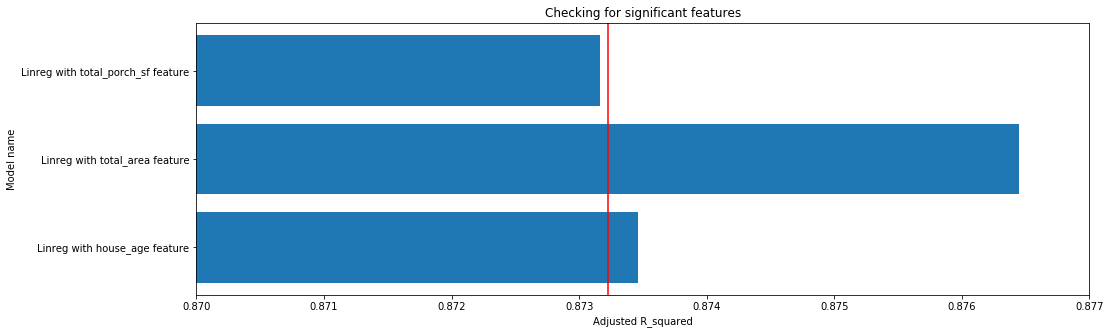

In [107]:
score_sig=score_card.loc[4:6,["Model_Name","Adj. R-Squared"]]


plt.figure(figsize=(16,5))
# adj_r2 for Linreg with significant_features
threshold = 0.873228
plt.barh(score_sig.Model_Name,score_sig["Adj. R-Squared"])
plt.xlim(0.87, 0.877)
plt.axvline(x=threshold,color='r')
plt.title("Checking for significant features")
plt.xlabel("Adjusted R_squared")
plt.ylabel("Model name")
plt.show()

In [108]:
# The vertical red line is the adj_rsquared value without adding any new features
# from the bar plot, we can see that adj_r2 for model with total_porch_sf features is less compare to threshold value
# this shows that total_porch_sf feature is not significant

In [109]:
##X_test_v1.drop("Total_porch_sf",1,inplace=True)

In [110]:
# we are considering only total_area and house_age as they are significant
X_train_final=pd.concat([X_train_v1,pd.DataFrame(df_new_features[["total_area","house_age"]].loc[X_train_v1.index])],1)
X_test_final=pd.concat([X_test_v1,pd.DataFrame(df_new_features[["total_area","house_age"]].loc[X_test_v1.index])],1)

In [111]:
X_test_final.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,BsmtFullBath,FullBath,...,Exterior2nd_Wd Shng,Functional_Min1,Functional_Min2,Functional_Sev,GarageType_Basment,GarageType_BuiltIn,SaleType_New,SaleCondition_Normal,total_area,house_age
546,0.780428,0.797303,-0.47208,1.286469,1.202410,-0.778799,-1.395653,-0.807940,-0.809573,0.864576,...,0,0,0,0,0,0,1,0,0.203164,-2.463723
752,0.064687,1.408372,-0.47208,1.221356,1.106958,1.148976,-1.395653,1.070446,-0.809573,0.864576,...,0,0,0,0,0,0,1,0,0.757959,-2.463723
890,0.254685,0.797303,-0.47208,1.090937,0.915769,-0.778799,0.859543,0.343823,1.185817,0.864576,...,0,0,0,0,0,0,0,1,-0.019189,-0.929211
409,-0.534199,0.797303,-0.47208,1.221356,1.106958,1.048702,0.783619,0.365720,1.185817,0.864576,...,0,0,0,0,0,0,1,0,0.037091,-2.463723
746,0.266205,0.797303,-0.47208,1.123567,0.963602,-0.778799,0.779562,-0.405220,1.185817,0.864576,...,0,0,0,0,0,1,0,1,0.811616,-0.929211


# 5.4 sklearn linear_regression

#### 5.4.1 Linear regression using sklearn

In [113]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_final,y_train)

ypred_test=lr.predict(X_test_final)
ypred_train=lr.predict(X_train_final)


r2=r2_score(y_train,ypred_train)
adj_r2=1-((1-r2)*(X_train_final.shape[0]-1))/(X_train_final.shape[0]-X_train_final.shape[1]-1)


rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))



In [114]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "sklearn linear regression with significant feature",
                     'Test_RMSE': rmse_test,
                     'Train_RMSE':rmse_train,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247
7,sklearn linear regression with significant fea...,0.882959,0.876624,20205.808028,25458.975124


# 5.4.2 Regularization

### 1. Ridge  regression model

In [115]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5,max_iter = 500)

# fit the model on train set
ridge.fit(X_train_final, y_train)

ypred_test=ridge.predict(X_test_final)
ypred_train=ridge.predict(X_train_final)


r2=r2_score(y_train,ypred_train)
adj_r2=1-((1-r2)*(X_train_final.shape[0]-1))/(X_train_final.shape[0]-X_train_final.shape[1]-1)


rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))

In [116]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "ridge regression(alpha=0.5)",
                     'Test_RMSE': rmse_test,
                     'Train_RMSE':rmse_train,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247
7,sklearn linear regression with significant fea...,0.882959,0.876624,20205.808028,25458.975124
8,ridge regression(alpha=0.5),0.882712,0.876363,20227.141248,25255.306322


#### 2.Ridge regression with best alpha

In [117]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)
# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train_final, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 5} 



In [118]:
ridge = Ridge(alpha = 5,max_iter = 500)

# fit the model on train set
ridge.fit(X_train_final, y_train)

ypred_test=ridge.predict(X_test_final)
ypred_train=ridge.predict(X_train_final)


r2=r2_score(y_train,ypred_train)
adj_r2=1-((1-r2)*(X_train_final.shape[0]-1))/(X_train_final.shape[0]-X_train_final.shape[1]-1)


rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))

In [119]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "ridge regression(alpha=5)",
                     'Test_RMSE': rmse_test,
                     'Train_RMSE':rmse_train,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247
7,sklearn linear regression with significant fea...,0.882959,0.876624,20205.808028,25458.975124
8,ridge regression(alpha=0.5),0.882712,0.876363,20227.141248,25255.306322
9,ridge regression(alpha=5),0.879718,0.873208,20483.617619,24980.305554


#### 3.Lasso regression

In [120]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha =0.1)

# fit the model on train set
lasso.fit(X_train_final, y_train)

ypred_test=lasso.predict(X_test_final)
ypred_train=lasso.predict(X_train_final)

r2=r2_score(y_train,ypred_train)
adj_r2=1-((1-r2)*(X_train_final.shape[0]-1))/(X_train_final.shape[0]-X_train_final.shape[1]-1)


rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))

In [121]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "lasso regression(alpha=0.1)",
                     'Test_RMSE': rmse_test,
                     'Train_RMSE':rmse_train,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247
7,sklearn linear regression with significant fea...,0.882959,0.876624,20205.808028,25458.975124
8,ridge regression(alpha=0.5),0.882712,0.876363,20227.141248,25255.306322
9,ridge regression(alpha=5),0.879718,0.873208,20483.617619,24980.305554


#### 4.Lasso regression with best alpha

In [122]:
from sklearn.linear_model import Lasso
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 5)
# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train_final, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

Best parameters for Lasso Regression:  {'alpha': 20} 



In [123]:
lasso = Lasso(alpha = 20)

# fit the model on train set
lasso.fit(X_train_final, y_train)

ypred_test=lasso.predict(X_test_final)
ypred_train=lasso.predict(X_train_final)

r2=r2_score(y_train,ypred_train)
adj_r2=1-((1-r2)*(X_train_final.shape[0]-1))/(X_train_final.shape[0]-X_train_final.shape[1]-1)


rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))

In [124]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "lasso regression(alpha=20)",
                     'Test_RMSE': rmse_test,
                     'Train_RMSE':rmse_train,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247
7,sklearn linear regression with significant fea...,0.882959,0.876624,20205.808028,25458.975124
8,ridge regression(alpha=0.5),0.882712,0.876363,20227.141248,25255.306322
9,ridge regression(alpha=5),0.879718,0.873208,20483.617619,24980.305554


#### 5.Elastic regression

In [125]:
from sklearn.linear_model import ElasticNet

In [126]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 1,l1_ratio=0.5)

# fit the model on train set
elastic.fit(X_train_final, y_train)

ypred_test=elastic.predict(X_test_final)
ypred_train=elastic.predict(X_train_final)

r2=r2_score(y_train,ypred_train)
adj_r2=1-((1-r2)*(X_train_final.shape[0]-1))/(X_train_final.shape[0]-X_train_final.shape[1]-1)


rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))

In [127]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "Elasticnet(alpha=1,l1_ratio=0.5)",
                     'Test_RMSE': rmse_test,
                     'Train_RMSE':rmse_train,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247
7,sklearn linear regression with significant fea...,0.882959,0.876624,20205.808028,25458.975124
8,ridge regression(alpha=0.5),0.882712,0.876363,20227.141248,25255.306322
9,ridge regression(alpha=5),0.879718,0.873208,20483.617619,24980.305554


#### 6. Elastic regression with best alpha and l1_ratio

In [128]:
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
 
# instantiate the ElasticNet() method
enet = ElasticNet()

# using GridSearchCV to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train
enet_grid.fit(X_train_final, y_train)

# get the best parameters
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 0.1, 'l1_ratio': 0.9} 



In [129]:
elastic = ElasticNet(alpha =0.1,l1_ratio=0.9)

# fit the model on train set
elastic.fit(X_train_final, y_train)

ypred_test=elastic.predict(X_test_final)
ypred_train=elastic.predict(X_train_final)

r2=r2_score(y_train,ypred_train)
adj_r2=1-((1-r2)*(X_train_final.shape[0]-1))/(X_train_final.shape[0]-X_train_final.shape[1]-1)


rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))

In [130]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "Elasticnet(alpha=1,l1_ratio=0.9)",
                     'Test_RMSE': rmse_test,
                     'Train_RMSE':rmse_train,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247
7,sklearn linear regression with significant fea...,0.882959,0.876624,20205.808028,25458.975124
8,ridge regression(alpha=0.5),0.882712,0.876363,20227.141248,25255.306322
9,ridge regression(alpha=5),0.879718,0.873208,20483.617619,24980.305554


# 5.4.3 SGDRegressor Model

In [131]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

# build the model on train data 
# use fit() to fit the model
sgd.fit(X_train_final, y_train)

# predict the values of target variable using entire data
#sgd_pred = linreg_with_SGD.predict(X_train)
ypred_test=sgd.predict(X_test_final)
ypred_train=sgd.predict(X_train_final)

r2=r2_score(y_train,ypred_train)
adj_r2=1-((1-r2)*(X_train_final.shape[0]-1))/(X_train_final.shape[0]-X_train_final.shape[1]-1)


rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))
rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))

In [132]:
actual_salesprice = y_test


linreg_metrics = pd.Series({
                     'Model_Name': "SGDRegressor",
                     'Test_RMSE': rmse_test,
                     'Train_RMSE':rmse_train,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linreg with insignificant variable,0.907200,0.887846,17992.105740,25063.779662
1,Linreg after vif,0.889505,0.871179,19632.626666,25803.932346
2,Linreg with power transform saleprice,0.906916,0.891478,18439.381645,27918.010290
3,Linreg with significant_features,0.879524,0.873228,20500.193157,25540.323352
4,Linreg with house_age feature,0.879855,0.873465,20471.946384,25556.994814
5,Linreg with total_area feature,0.882692,0.876452,20228.863092,25446.054414
6,Linreg with total_porch_sf feature,0.879572,0.873166,20496.090843,25588.914247
7,sklearn linear regression with significant fea...,0.882959,0.876624,20205.808028,25458.975124
8,ridge regression(alpha=0.5),0.882712,0.876363,20227.141248,25255.306322
9,ridge regression(alpha=5),0.879718,0.873208,20483.617619,24980.305554


# Conclusion

(17500, 30000)

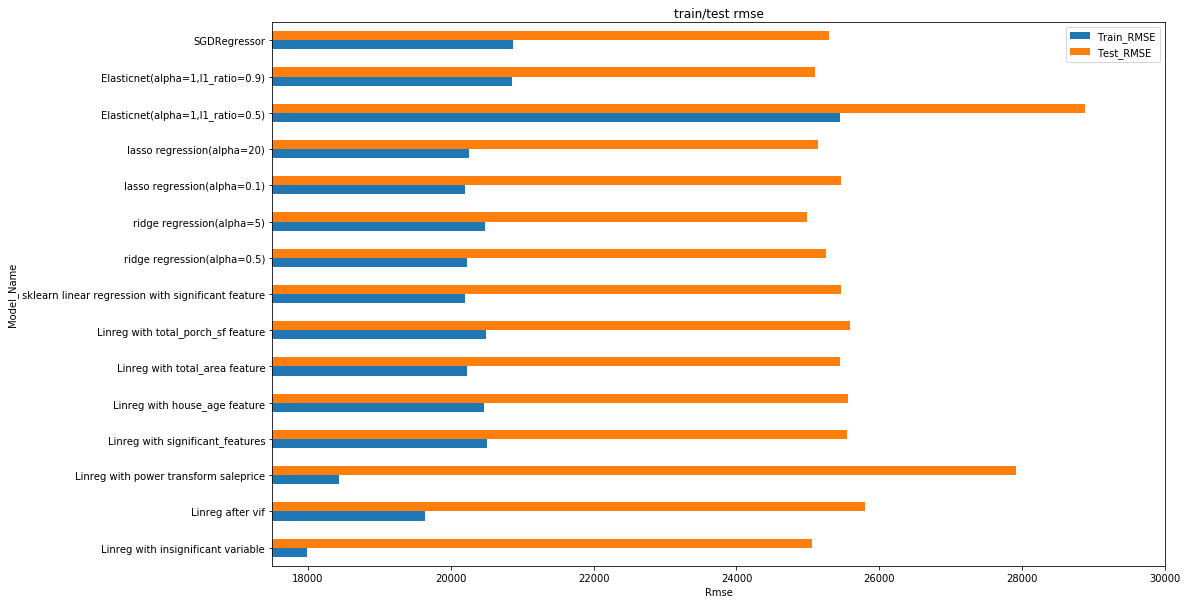

In [144]:
score_card.plot(y=["Train_RMSE", "Test_RMSE"],x="Model_Name",  kind="barh",figsize =(16,10))
plt.xlabel("Rmse")
plt.title("train/test rmse")
plt.xlim(17500,30000)

Text(0.5, 1.0, 'r_square and adj_rqsuare')

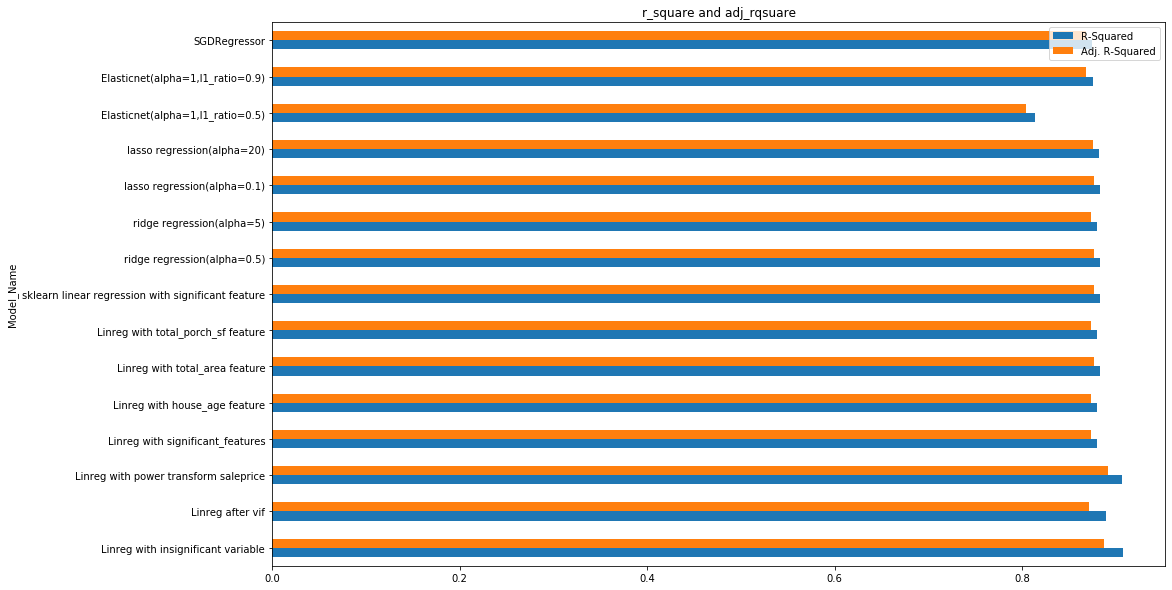

In [145]:
score_card.plot(y=["R-Squared", "Adj. R-Squared"],x="Model_Name",  kind="barh",figsize =(16,10))
plt.title("r_square and adj_rqsuare")

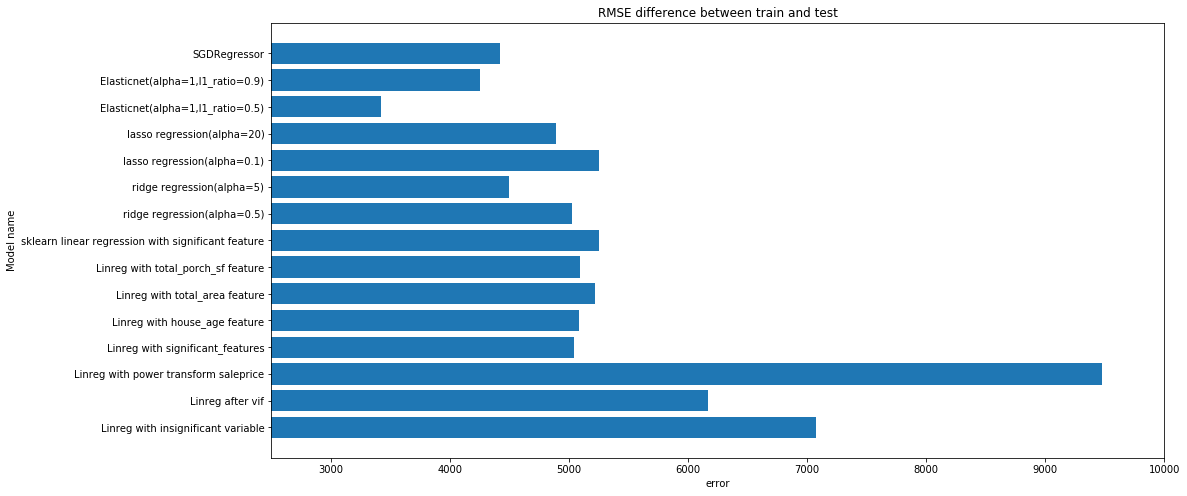

In [135]:
error_difference=score_card["Test_RMSE"]-score_card["Train_RMSE"]
plt.figure(figsize=(16,8))
plt.barh(score_card.Model_Name,error_difference)
plt.xlim(2500,10000)
plt.title("RMSE difference between train and test")
plt.xlabel("error")
plt.ylabel("Model name")
plt.show()

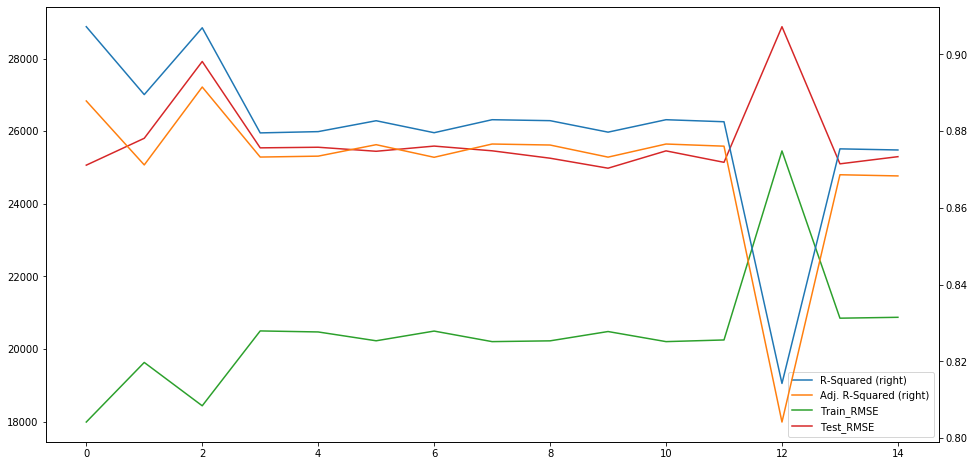

In [140]:
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'],figsize=(16,8))
# plt.figure(figsize=(16,8))
# display just the plot
plt.show()

In [147]:
e=elastic.coef_
l=lasso.coef_
r=ridge.coef_
s=sgd.coef_

In [150]:
df_coef=pd.DataFrame()
df_coef["feature"]=X_train_final.columns
df_coef["coef_value"]=r

In [153]:
df_coef[:30]

,feature,coef_value
0,LotArea,8575.175315
1,OverallQual,10251.831395
2,OverallCond,5351.215392
3,YearBuilt,3973.529081
4,YearRemodAdd,3550.150348
5,MasVnrArea,1614.097067
6,BsmtFinSF1,3681.649234
7,1stFlrSF,7965.040145
8,BsmtFullBath,2999.161400
9,FullBath,4062.819729


In [154]:
df_coef[30:]

,feature,coef_value
30,Neighborhood_Gilbert,-15518.770832
31,Neighborhood_IDOTRR,-10124.687313
32,Neighborhood_MeadowV,-16006.502442
33,Neighborhood_Mitchel,-15474.731535
34,Neighborhood_NAmes,-12094.985191
35,Neighborhood_NWAmes,-13885.368203
36,Neighborhood_NoRidge,23304.108699
37,Neighborhood_NridgHt,21798.720256
38,Neighborhood_OldTown,-10942.597885
39,Neighborhood_Sawyer,-10986.304178


In [ ]:
# the price of the house highly depend on Neighbourhood 
# 1 unit increase in total_area will increase 9248 dollar in saleprice
# 1 unit increase in house_age will decrease 5090 dollar in saleprice

# Extra analysis

In [ ]:
# Ridge regression with best alpha is the perfect model for us, it gives the lowest test error

In [ ]:
x_final=X_train_final.append(X_test_final)
y_final=y_train.append(y_test)


In [ ]:
from sklearn.model_selection import cross_val_score
ridge = Ridge()
print(cross_val_score(ridge, x_final, y_final, cv=10))

In [ ]:
cross_val_score(ridge, x_final, y_final, cv=10).mean()

In [ ]:
param_grid = { 'alpha': 10.0 ** -np.arange(1, 7), 
        
               'loss': ['squared_loss'], 
    
               'penalty': ['l2', 'l1', 'elasticnet'],
    
               'learning_rate': ['constant', 'optimal', 'invscaling']
}
sgd = SGDRegressor()

# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
clf = GridSearchCV(sgd, param_grid)

# fit the model on train data
clf.fit(X_train_final, y_train)

In [ ]:
# print the best parameters
# print best alpha value
print('Best alpha:', clf.best_estimator_.alpha)

# print best tolerance
print('Best tol:', clf.best_estimator_.tol) 

# print best starting rate (Use eta0 to specify the starting learning)
print('Best eta0:', clf.best_estimator_.eta0)

# print best learning rate
print('Best learning rate:', clf.best_estimator_.learning_rate) 

In [ ]:
# squared_loss: ordinary least squares loss
# 'eta0': specify the starting learning
linreg_SGD_using_best_parameter = SGDRegressor(alpha=0.001,
                                               eta0=0.01, 
                                               learning_rate='invscaling')

# fit the SGD model using best parameter
linreg_SGD_using_best_parameter.fit(X_train_final,y_train)

In [ ]:
# predict the values on test data using predict
linreg_SGD_using_best_parameter_predictions = linreg_SGD_using_best_parameter.predict(X_test_final)
train_predict=linreg_SGD_using_best_parameter.predict(X_train_final)

In [ ]:
linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate rmse
linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)
train_rmse= np.sqrt(mean_squared_error(y_train,train_predict))
# calculate R-squared
linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate Adjusted R-squared
linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test_final.shape[1]-1)

In [ ]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'Test_RMSE': linreg_SGD_using_best_parameter_rmse ,
                    'Train_RMSE': train_rmse,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card